# Coal production in mines 2013

by: david salmela

Abstract: I did some predictions stuff

In [56]:


%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

sns.set()

## Cleaned Data

Cleaned this data and stored in: deliver/data_cleaning.ipnyb

In [57]:
df = pd.read_csv("../data/cleaned_coalpublic2013.csv", index_col="MSHA ID")
df[['Year','Mine_Name']].head()

,Year,Mine_Name
MSHA ID,,
103381,2013,Tacoa Highwall Miner
103404,2013,Reid School Mine
100759,2013,North River #1 Underground Min
103246,2013,Bear Creek
103451,2013,Knight Mine


# Predict Production of Coal Mines

In [58]:
features = [
            'Average_Employees',
            'Labor_Hours',
            ]
categoricals =  [
            'Mine_State',
            'Mine_County',
            'Mine_Status',
            'Mine_Type',
            'Company_Type',
            'Operation_Type',
            'Union_Code',
            'Coal_Supply_Region',
            ]
target = 'log_production'



<function matplotlib.pyplot.tight_layout>

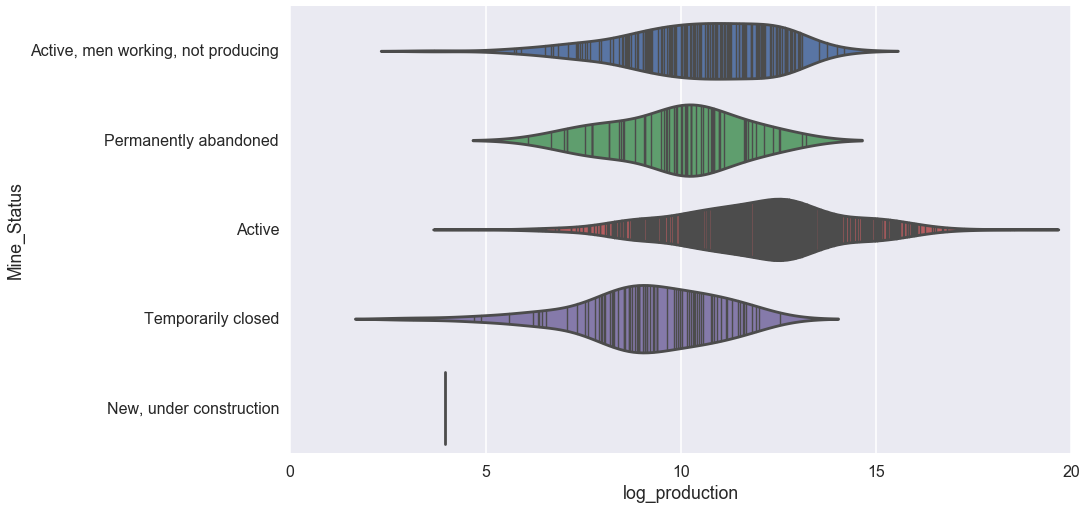

In [59]:
# compare minestatus to log_production
sns.set_context('poster')
fig=plt.subplots(figsize=(14,8))
sns.violinplot(y='Mine_Status', x='log_production', data=df, split=True, inner='stick',)
plt.tight_layout


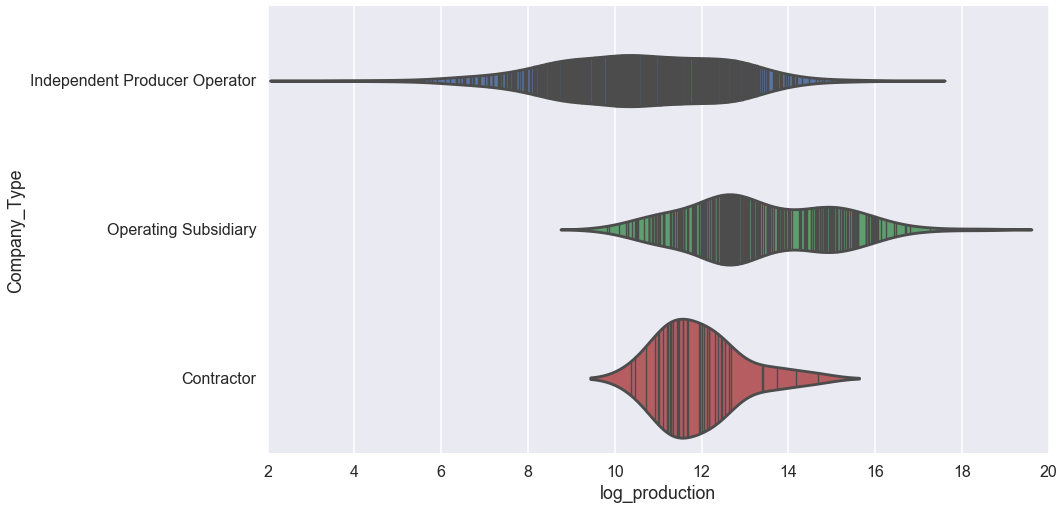

In [60]:
# compare company_type to log_production
fig=plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y='Company_Type', x='log_production', data=df, split=True, inner='stick',)
plt.tight_layout
plt.savefig("../figures/Coal_prediction_company_type_vs_log_production")

In [61]:

dummy_categoricals=[]
dummy_no_drop=[]


for c in categoricals:
    # Avoid the dummy variable trap
    drop_var = sorted(df[c].unique())[-1]
    temp_df = pd.get_dummies(df[c],prefix=c)
    
    df = pd.concat([df, temp_df], axis=1)
    temp_df.drop('_'.join([c, str(drop_var)]), axis=1, inplace=True)
    dummy_categoricals += temp_df.columns.tolist()
    #print "----",dummy_categoricals

#    Random Forest Regressor

In [62]:
 train, test = train_test_split(df, test_size=0.3)
    

In [63]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True)
rf.fit(train[features + dummy_categoricals], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

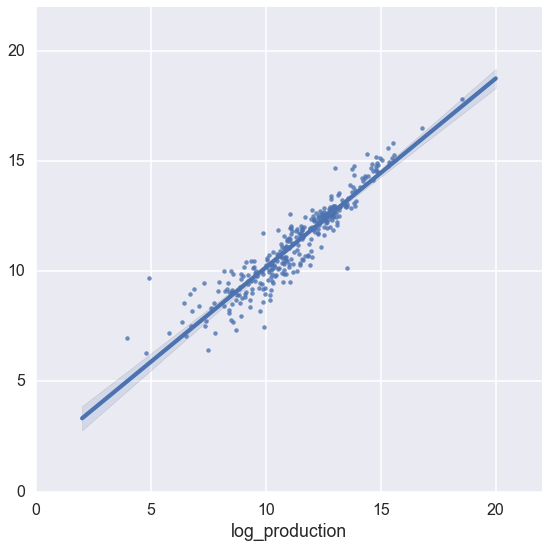

In [64]:
fig = plt.subplots(figsize=(8,8))
sns.regplot(test[target], rf.predict(test[features +dummy_categoricals]))
plt.xlim(0,22)
plt.ylim(0,22)
plt.tight_layout()

In [65]:
predicted=rf.predict(test[features+dummy_categoricals])
r2_score(test[target], predicted)

0.86560466784358847

In [66]:
explained_variance_score(test[target], predicted)

0.86560831793227211

In [67]:
mean_squared_error(test[target],predicted)

0.62248596444906901

In [69]:
rf_importance=pd.DataFrame({'name':train[features+dummy_categoricals].columns,
                            'importance':rf.feature_importances_
                            }).sort_values(by='importance', ascending=False).reset_index(drop=True)
rf_importance.head()

,importance,name
0,0.829997,Labor_Hours
1,0.070876,Average_Employees
2,0.008872,Coal_Supply_Region_Powder River Basin
3,0.008249,Mine_Type_Surface
4,0.004288,Mine_County_Martin
